##Importación de Paquetes

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import mean_absolute_error
from keras.optimizers import SGD
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv("drive/MyDrive/I.A/BasesDatos/MLB1.csv")

In [ ]:
df

,id,year,issue_d,final_d,emp_length_int,home_ownership,home_ownership_cat,income_category,annual_inc,income_cat,...,loan_condition_cat,interest_rate,grade,grade_cat,dti,total_pymnt,total_rec_prncp,recoveries,installment,region
0,1077501,2011,01/12/2011,1012015,10.0,RENT,1,Low,24000,1,...,0,10.65,B,2,27.65,5861.071414,5000.00,0.00,162.87,munster
1,1077430,2011,01/12/2011,1042013,0.5,RENT,1,Low,30000,1,...,1,15.27,C,3,1.00,1008.710000,456.46,117.08,59.83,leinster
2,1077175,2011,01/12/2011,1062014,10.0,RENT,1,Low,12252,1,...,0,15.96,C,3,8.72,3003.653644,2400.00,0.00,84.33,cannught
3,1076863,2011,01/12/2011,1012015,10.0,RENT,1,Low,49200,1,...,0,13.49,C,3,20.00,12226.302210,10000.00,0.00,339.31,ulster
4,1075358,2011,01/12/2011,1012016,1.0,RENT,1,Low,80000,1,...,0,12.69,B,2,17.94,3242.170000,2233.10,0.00,67.79,ulster
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887374,36371250,2015,01/01/2015,1012016,8.0,RENT,1,Low,31000,1,...,0,11.99,B,2,28.69,3971.880000,2944.53,0.00,332.10,ulster
887375,36441262,2015,01/01/2015,1012016,10.0,MORTGAGE,3,Low,79000,1,...,0,11.99,B,2,3.90,9532.390000,7066.74,0.00,797.03,Northern-Irl
887376,36271333,2015,01/01/2015,1012016,5.0,RENT,1,Low,35000,1,...,0,15.99,D,4,30.90,3769.740000,1844.50,0.00,316.07,leinster
887377,36490806,2015,01/01/2015,1012016,1.0,RENT,1,Low,64400,1,...,0,19.99,E,5,27.19,3787.670000,1552.69,0.00,317.86,Northern-Irl


array([[<Axes: title={'center': 'id'}>, <Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'final_d'}>,
        <Axes: title={'center': 'emp_length_int'}>],
       [<Axes: title={'center': 'home_ownership_cat'}>,
        <Axes: title={'center': 'annual_inc'}>,
        <Axes: title={'center': 'income_cat'}>,
        <Axes: title={'center': 'loan_amount'}>],
       [<Axes: title={'center': 'term_cat'}>,
        <Axes: title={'center': 'application_type_cat'}>,
        <Axes: title={'center': 'purpose_cat'}>,
        <Axes: title={'center': 'interest_payment_cat'}>],
       [<Axes: title={'center': 'loan_condition_cat'}>,
        <Axes: title={'center': 'interest_rate'}>,
        <Axes: title={'center': 'grade_cat'}>,
        <Axes: title={'center': 'dti'}>],
       [<Axes: title={'center': 'total_pymnt'}>,
        <Axes: title={'center': 'total_rec_prncp'}>,
        <Axes: title={'center': 'recoveries'}>,
        <Axes: title={'center': 'installment'}>]], dtype=object)

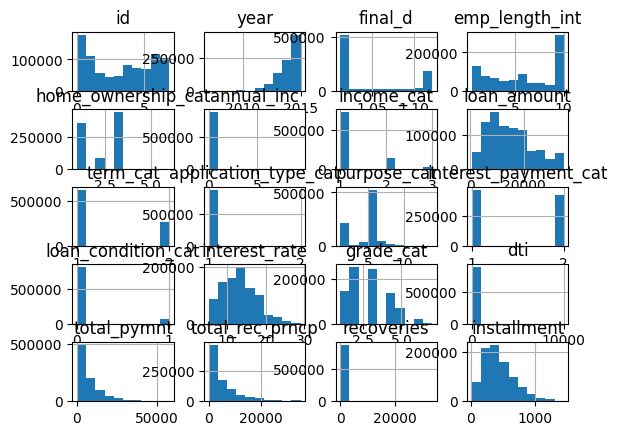

In [ ]:
df.hist()

<ipython-input-7-ee0cc2f14dea>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),vmax=0.8,


<Axes: title={'center': 'Corr Pearson'}>

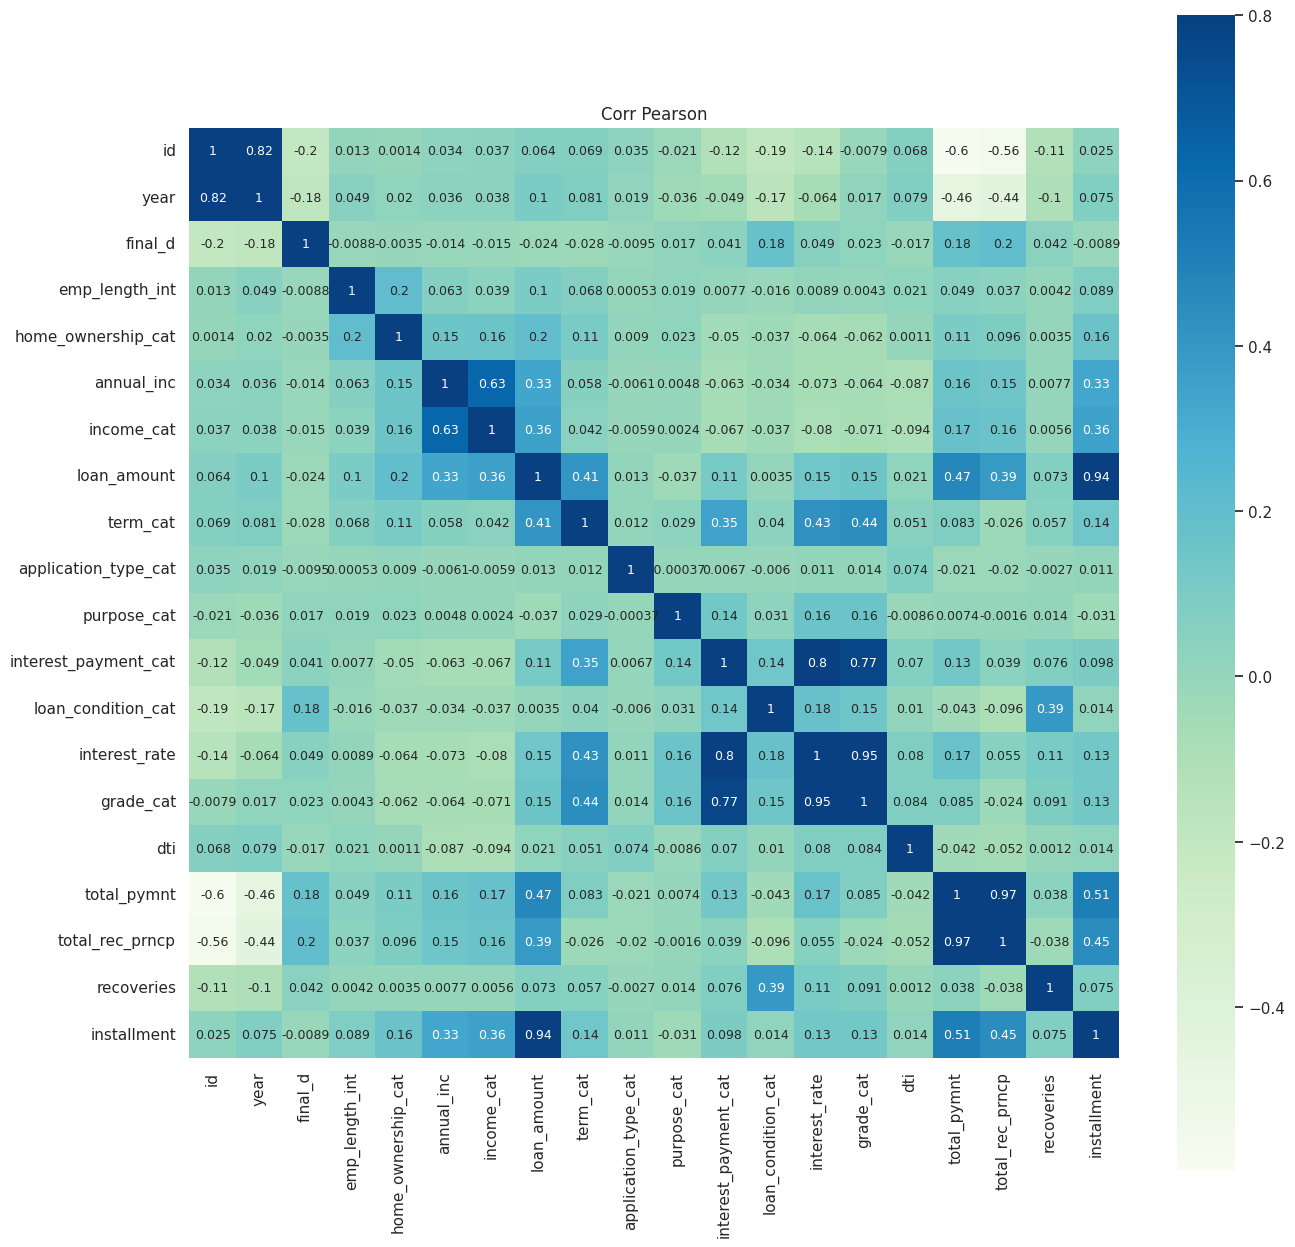

In [ ]:
sns.set(style= 'whitegrid',font_scale=1);
plt.figure(figsize=(15,15))
plt.title("Corr Pearson")
sns.heatmap(df.corr(),vmax=0.8,
            square=True,cmap="GnBu",
            linecolor='r',annot=True,
            annot_kws={'size':9})

In [ ]:
df=df.drop(['id'],axis=1)
df=df.drop(['issue_d'],axis=1)
df=df.drop(['home_ownership_cat'],axis=1)
df=df.drop(['term_cat'],axis=1)
df=df.drop(['income_cat'],axis=1)
df=df.drop(['application_type_cat'],axis=1)
df=df.drop(['purpose_cat'],axis=1)
df=df.drop(['interest_payment_cat'],axis=1)
df=df.drop(['loan_condition_cat'],axis=1)
df=df.drop(['grade_cat'],axis=1)
df=df.drop(['loan_amount'],axis=1)
df=df.drop(['total_rec_prncp'],axis=1)

<ipython-input-9-ee0cc2f14dea>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),vmax=0.8,


<Axes: title={'center': 'Corr Pearson'}>

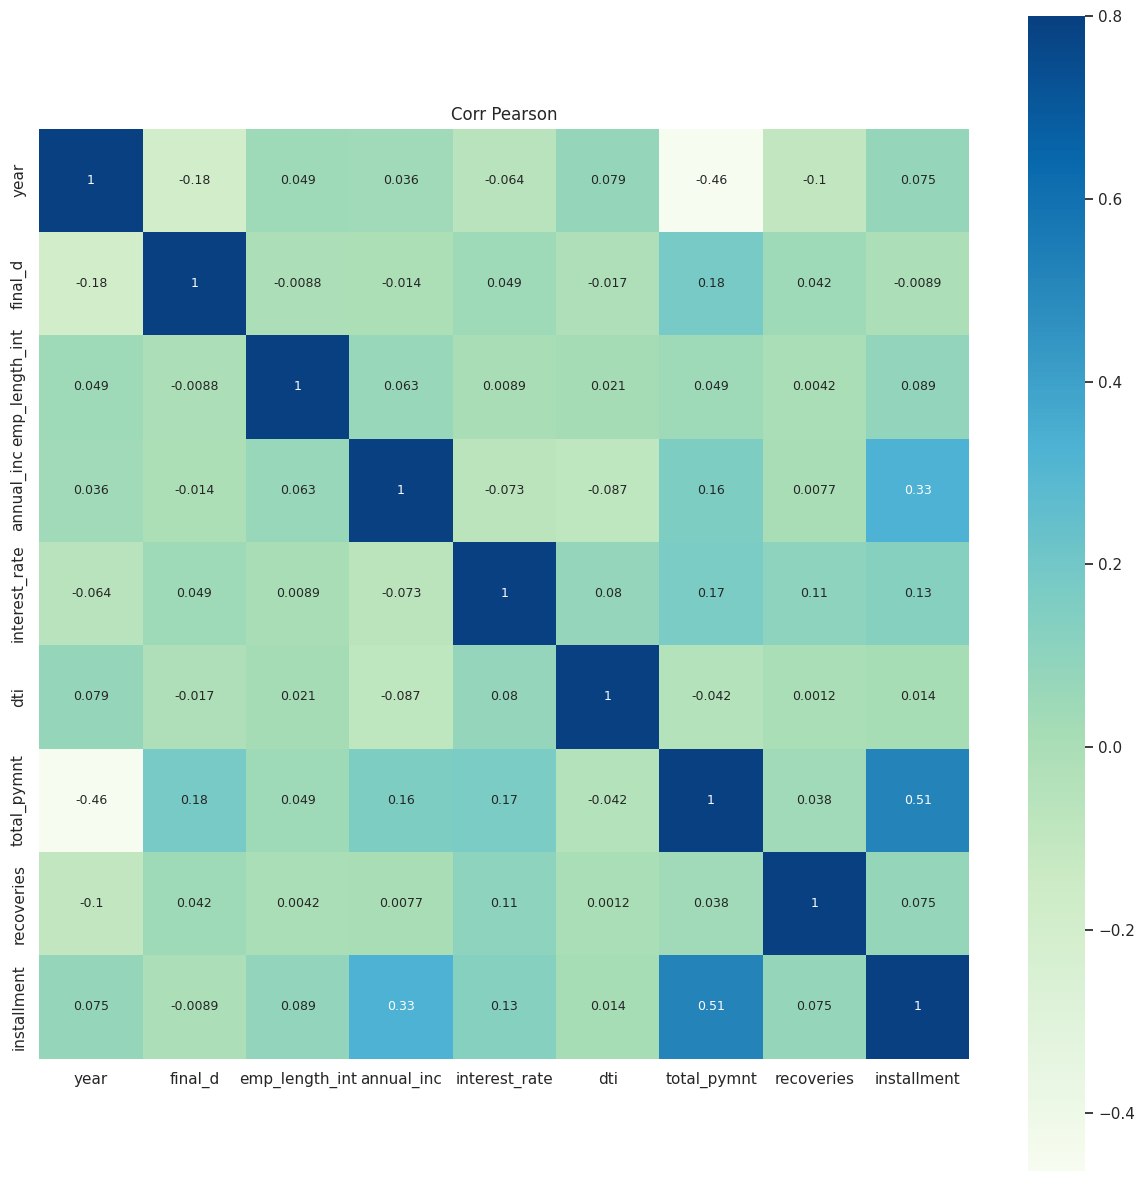

In [ ]:
sns.set(style= 'whitegrid',font_scale=1);
plt.figure(figsize=(15,15))
plt.title("Corr Pearson")
sns.heatmap(df.corr(),vmax=0.8,
            square=True,cmap="GnBu",
            linecolor='r',annot=True,
            annot_kws={'size':9})

In [ ]:
le = LabelEncoder()
df['home_ownership']=le.fit_transform(df['home_ownership'])
df['income_category']=le.fit_transform(df['income_category'])
df['term']=le.fit_transform(df['term'])
df['application_type']=le.fit_transform(df['application_type'])
df['purpose']=le.fit_transform(df['purpose'])
df['interest_payments']=le.fit_transform(df['interest_payments'])
df['loan_condition']=le.fit_transform(df['loan_condition'])
df['grade']=le.fit_transform(df['grade'])
df['region']=le.fit_transform(df['region'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   year               887379 non-null  int64  
 1   final_d            887379 non-null  int64  
 2   emp_length_int     887379 non-null  float64
 3   home_ownership     887379 non-null  int64  
 4   income_category    887379 non-null  int64  
 5   annual_inc         887379 non-null  int64  
 6   term               887379 non-null  int64  
 7   application_type   887379 non-null  int64  
 8   purpose            887379 non-null  int64  
 9   interest_payments  887379 non-null  int64  
 10  loan_condition     887379 non-null  int64  
 11  interest_rate      887379 non-null  float64
 12  grade              887379 non-null  int64  
 13  dti                887379 non-null  float64
 14  total_pymnt        887379 non-null  float64
 15  recoveries         887379 non-null  float64
 16  in

array([[<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'final_d'}>,
        <Axes: title={'center': 'emp_length_int'}>,
        <Axes: title={'center': 'home_ownership'}>],
       [<Axes: title={'center': 'income_category'}>,
        <Axes: title={'center': 'annual_inc'}>,
        <Axes: title={'center': 'term'}>,
        <Axes: title={'center': 'application_type'}>],
       [<Axes: title={'center': 'purpose'}>,
        <Axes: title={'center': 'interest_payments'}>,
        <Axes: title={'center': 'loan_condition'}>,
        <Axes: title={'center': 'interest_rate'}>],
       [<Axes: title={'center': 'grade'}>,
        <Axes: title={'center': 'dti'}>,
        <Axes: title={'center': 'total_pymnt'}>,
        <Axes: title={'center': 'recoveries'}>],
       [<Axes: title={'center': 'installment'}>,
        <Axes: title={'center': 'region'}>, <Axes: >, <Axes: >]],
      dtype=object)

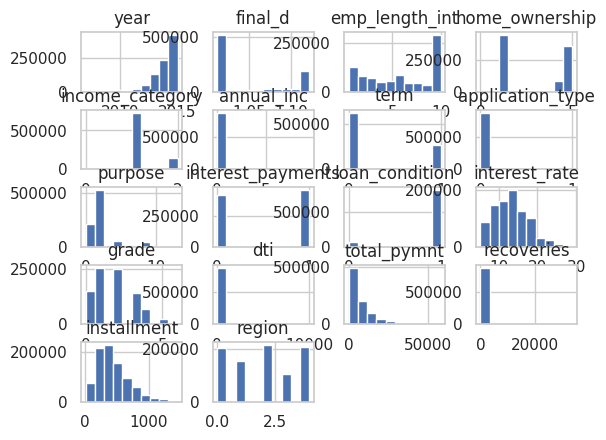

In [ ]:
df.hist()

In [ ]:
df.isnull().sum()

year                 0
final_d              0
emp_length_int       0
home_ownership       0
income_category      0
annual_inc           0
term                 0
application_type     0
purpose              0
interest_payments    0
loan_condition       0
interest_rate        0
grade                0
dti                  0
total_pymnt          0
recoveries           0
installment          0
region               0
dtype: int64

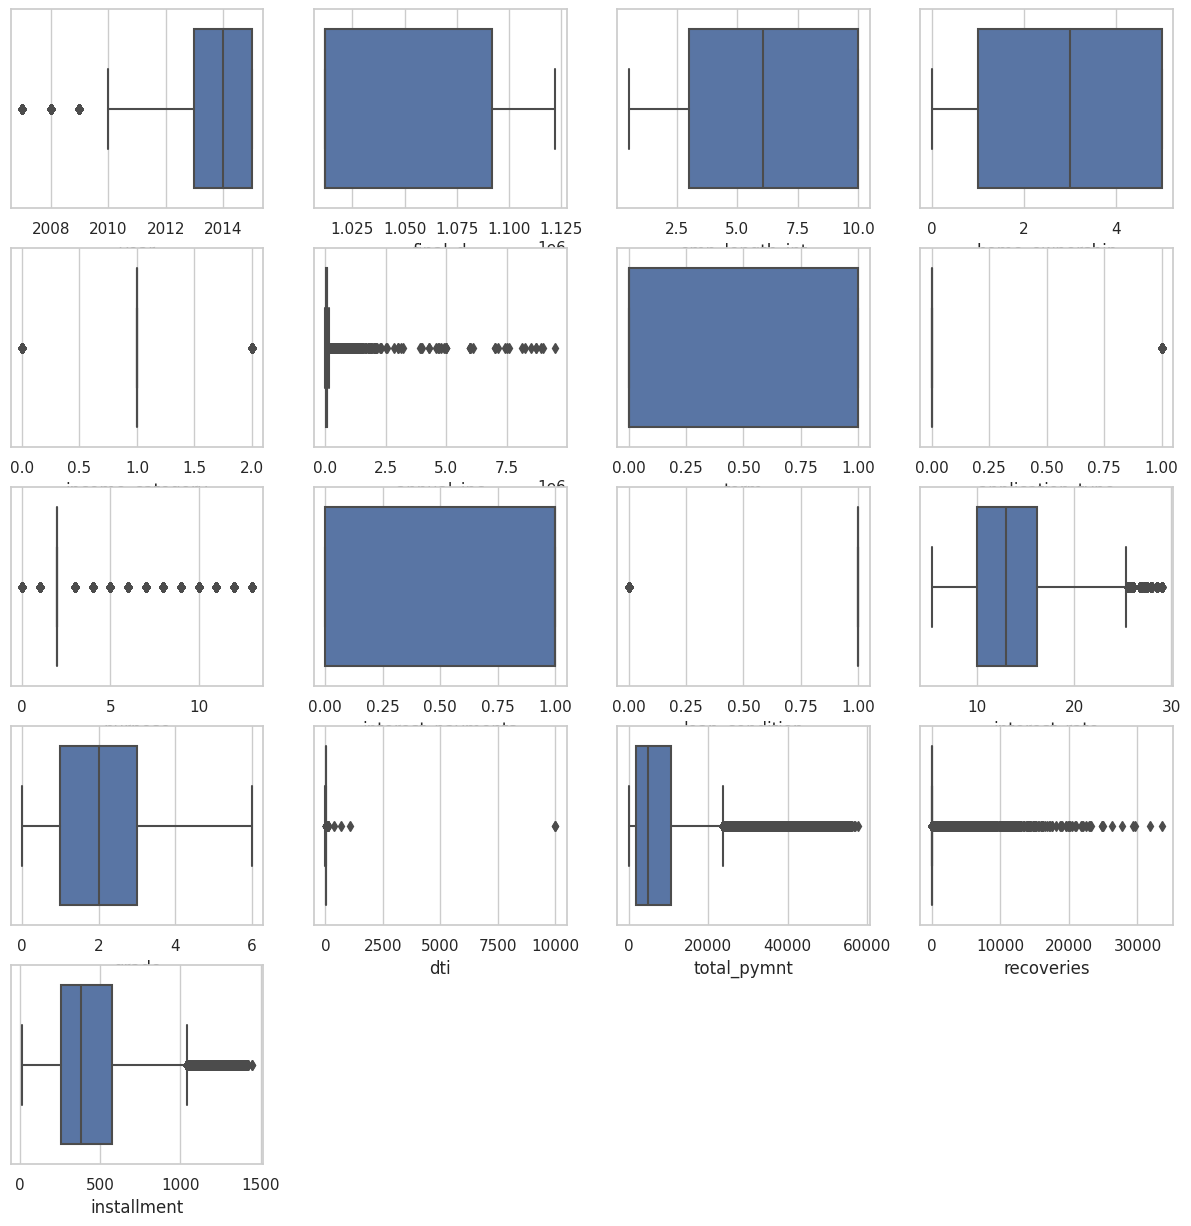

In [ ]:
plt.figure(figsize=(15,15))
col =df.columns[:-1]
for i in enumerate(col):
  plt.subplot(5,4,i[0]+1)
  sns.boxplot(x=i[1],data =df)

In [ ]:
for i in col:
  q1= df[i].quantile(0.1)
  q4= df[i].quantile(0.90)
  df[i][df[i]<=q1]=q1
  df[i][df[i]>=q4]=q4

<ipython-input-16-430205a46768>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i][df[i]<=q1]=q1
<ipython-input-16-430205a46768>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i][df[i]>=q4]=q4
<ipython-input-16-430205a46768>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i][df[i]<=q1]=q1
<ipython-input-16-430205a46768>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the c

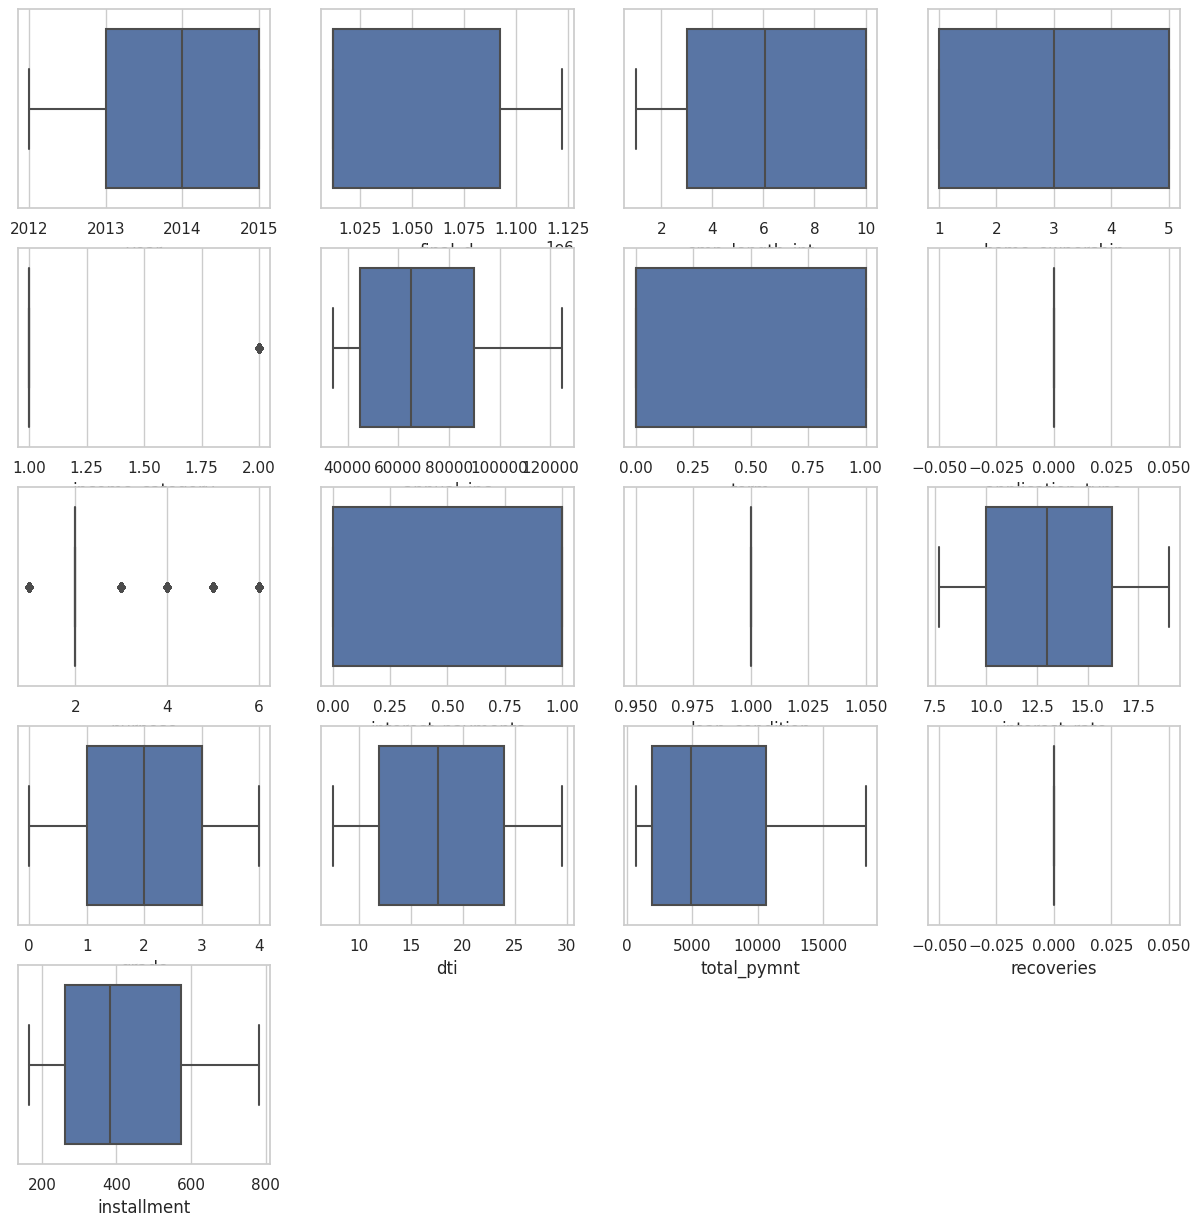

In [ ]:
plt.figure(figsize=(15,15))
col =df.columns[:-1]
for i in enumerate(col):
  plt.subplot(5,4,i[0]+1)
  sns.boxplot(x=i[1],data =df)

In [ ]:
X= df.drop('total_pymnt',axis=1)
y= df['total_pymnt']

In [ ]:
scalerMinMax= MinMaxScaler()
scalerMinMax.fit(X)
X=scalerMinMax.transform(X)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=8000,test_size=0.2)

In [ ]:
# Modelo Neuronal
modelANN= Sequential()
modelANN.add(Dense(20,activation='relu' ))
modelANN.add(Dense(1),activation='relu' )
modelANN.compile(optimizer='adam',
                 loss='mse')

In [ ]:
modelANN.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),batch_size=500, epochs=150,verbose=1)

Epoch 1/150
1420/1420 [==============================] - 6s 3ms/step - loss: 78491696.0000 - val_loss: 76199352.0000
Epoch 2/150
1420/1420 [==============================] - 5s 3ms/step - loss: 71377032.0000 - val_loss: 66883176.0000
Epoch 3/150
1420/1420 [==============================] - 3s 2ms/step - loss: 61106076.0000 - val_loss: 56063804.0000
Epoch 4/150
1420/1420 [==============================] - 3s 2ms/step - loss: 50629400.0000 - val_loss: 46183068.0000
Epoch 5/150
1420/1420 [==============================] - 5s 4ms/step - loss: 41973120.0000 - val_loss: 38874940.0000
Epoch 6/150
1420/1420 [==============================] - 3s 2ms/step - loss: 36264568.0000 - val_loss: 34625440.0000
Epoch 7/150
1420/1420 [==============================] - 4s 3ms/step - loss: 33134502.0000 - val_loss: 32277864.0000
Epoch 8/150
1420/1420 [==============================] - 5s 4ms/step - loss: 31190160.0000 - val_loss: 30550410.0000
Epoch 9/150
1420/1420 [==============================] - 5s 4ms/

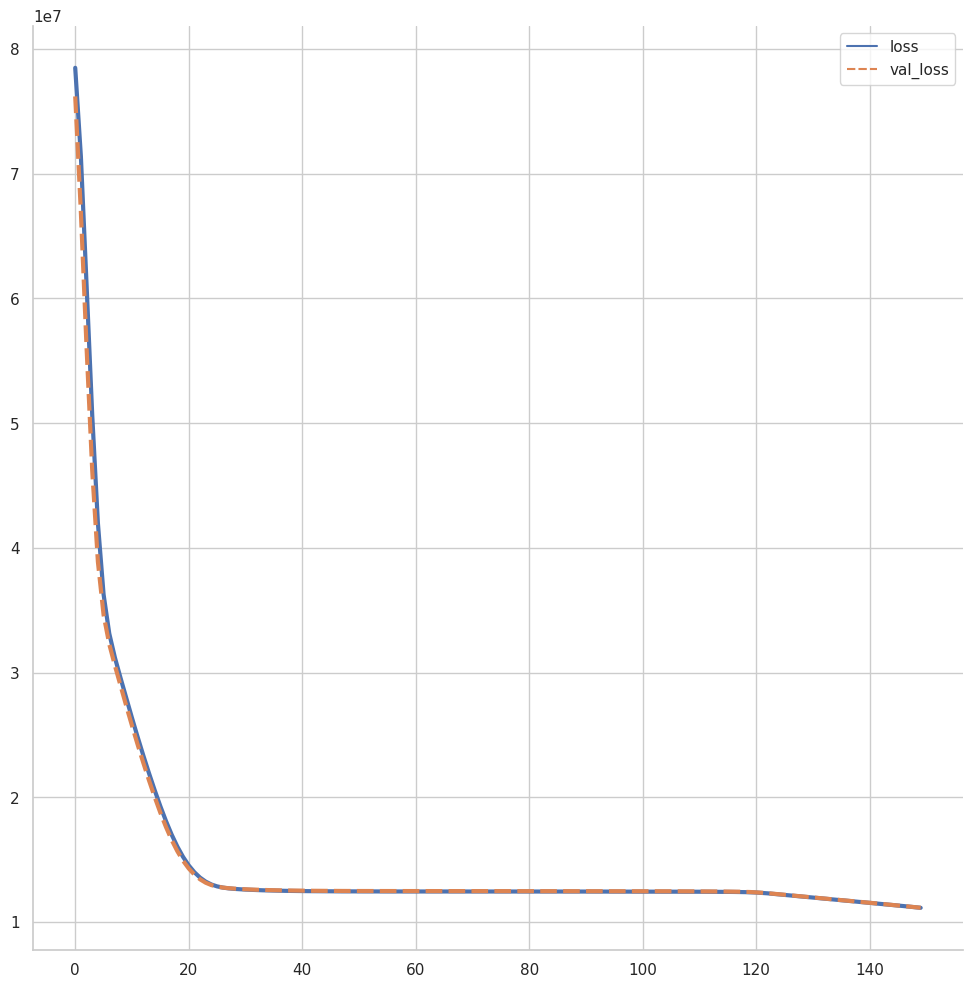

In [ ]:
loss = pd.DataFrame(modelANN.history.history)
plt.figure(figsize=(12,12))
sns.lineplot(data=loss,lw=3)
sns.despine()

In [ ]:
y_pred_Test = modelANN.predict(X_test)
error_absolute = mean_absolute_error(y_test,y_pred_Test)
print(error_absolute)

5547/5547 [==============================] - 8s 1ms/step
2395.285533623457


In [ ]:
y_pred_train = modelANN.predict(X_train)
error_absolute_train = mean_absolute_error(y_train,y_pred_train)
print(error_absolute_train)

22185/22185 [==============================] - 30s 1ms/step
2394.910625526327
